In [1]:
# Sound file taken from: https://www.kaggle.com/c/birdclef-2022

import soundfile as sf
from IPython.display import Audio, display
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
import numpy as np

waveform, sample_rate = sf.read('XC125458.ogg')
display(Audio(waveform, rate=sample_rate))

# Generating the Fourier Transform
num_frames = len(waveform)
yf = fft(waveform)

yf_cut = yf.copy()
length = len(yf)

#The fft chart is a mirror image
#When we supress the low, we need to suppress both sides
#The high frequency suppression is just in the middle

low_cutoff = 25000
high_cutoff = 80000

yf_cut[0:low_cutoff] = 0
yf_cut[length-low_cutoff:length] = 0
yf_cut[high_cutoff:length-high_cutoff] = 0

inverse = ifft(yf_cut)
inverse = inverse.real

display(Audio(inverse, rate=sample_rate))

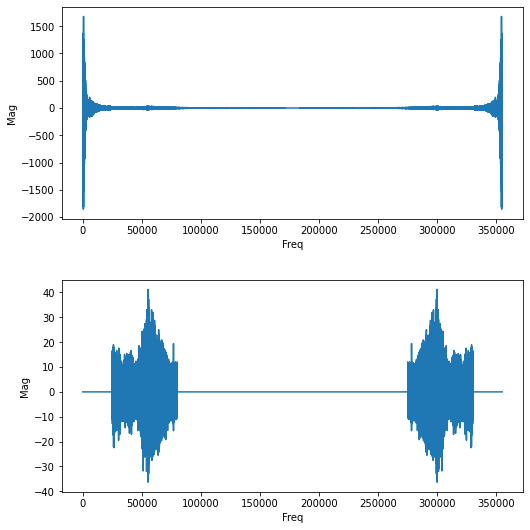

In [10]:
#Plotting FFT before and after the suppression
fig, axs = plt.subplots(2,figsize=(8,8))
axs[0].plot(yf.real)
axs[1].plot(yf_cut.real)

for ax in axs.flat:
        ax.set(xlabel='Freq', ylabel='Mag')
    
fig.tight_layout(pad=3.0)
plt.show()